In [8]:
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage import io

In [9]:
# Utility function

def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

In [10]:
# Read image
im_org = io.imread('data/NusaPenida.png')

In [11]:
# Euclidian transformation
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


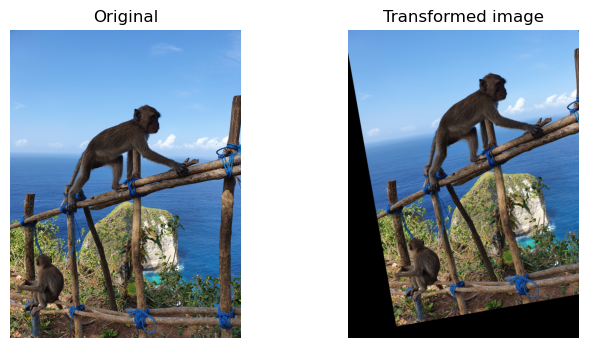

In [13]:
# Apply transformation with warp
trans_im = warp(im_org, tform)
# Show original and transformed image
show_comparison(im_org, trans_im, "Transformed image")


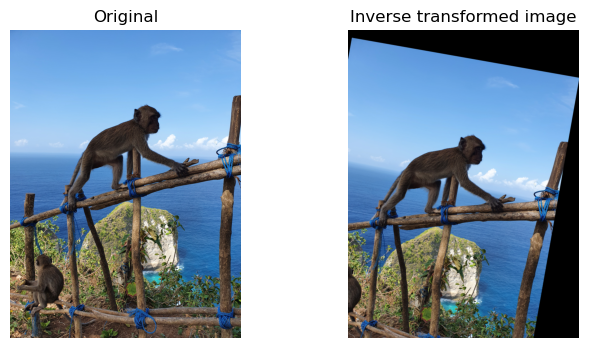

In [15]:
# Inverse transformation
tform_inv = tform.inverse
trans_im_inv = warp(im_org, tform_inv)
# Show original and transformed image
show_comparison(im_org, trans_im_inv, "Inverse transformed image")

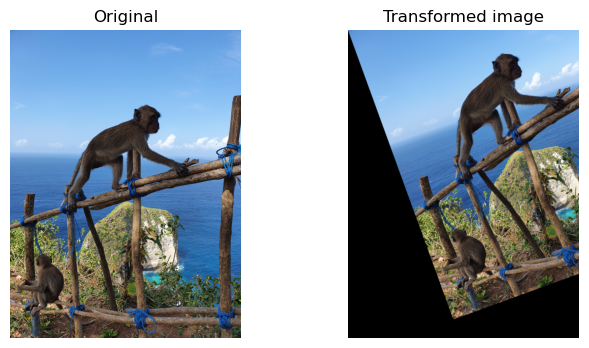

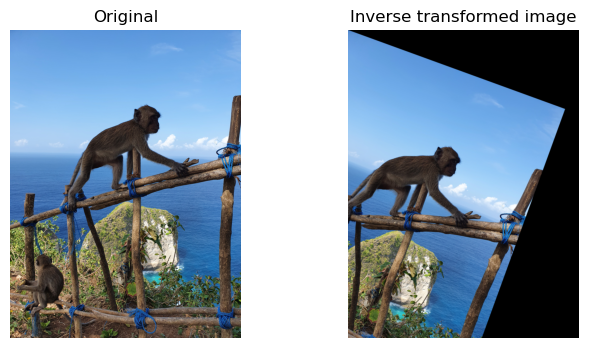

In [16]:
# Inverse transformation with only rotation
rotation_angle = 20.0 * math.pi / 180.
tform = EuclideanTransform(rotation=rotation_angle)

trans_im = warp(im_org, tform)
trans_im_inv = warp(im_org, tform.inverse)

# Show original and transformed image
show_comparison(im_org, trans_im, "Transformed image")
show_comparison(im_org, trans_im_inv, "Inverse transformed image")

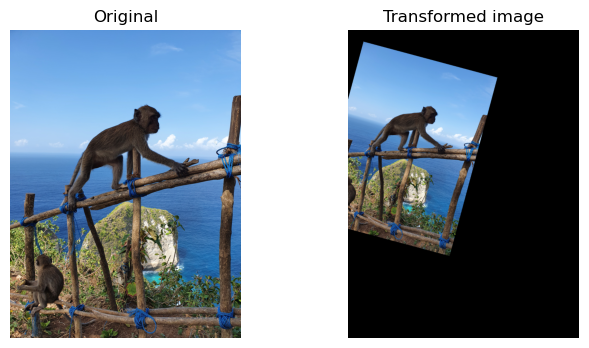

In [18]:
tform = SimilarityTransform(scale=0.6, rotation=15*math.pi/180, translation=(40, 30))

im_trans = warp(im_org, tform.inverse)
show_comparison(im_org, im_trans, "Transformed image")

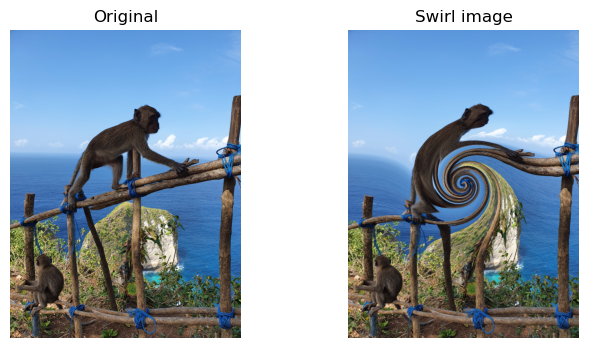

In [19]:
# Swirl transformation
str = 10 # strength
rad = 300 # radius
swirl_img = swirl(im_org, strength=str, radius=rad)

show_comparison(im_org, swirl_img, "Swirl image")

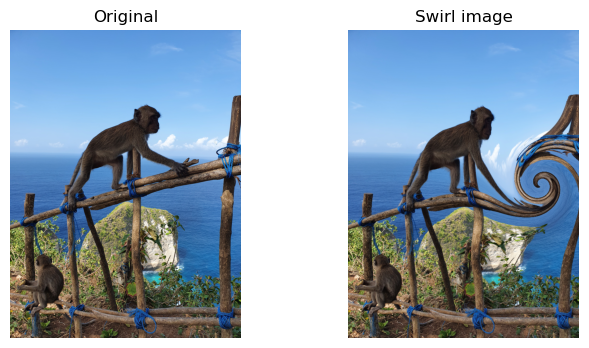

In [20]:
# Swirl transformation with different center
str = 10 # strength
rad = 300 # radius
c = [500, 400] # center
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)

show_comparison(im_org, swirl_img, "Swirl image")